In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
cmap = plt.cm.get_cmap('plasma')
c_1 = cmap(0.05)
c_2 = cmap(0.7)

In [2]:
total_lines = []
for name in ["p1q10_accuracies_global_nsim_randomized_miguelmetric_2.txt","p1q0_accuracies_courses_nsim_randomized_miguelmetric_2.txt"]:
    with open(name) as f:
        total_lines.append(f.readlines())
num_data = 390

In [3]:
acc_global,acc_courses = total_lines

In [4]:
acc_global_clf = [float(elem[:-2]) for elem in acc_global[1:num_data+1]]
acc_global_ann = [float(elem[:-2]) for elem in acc_global[num_data+2:]]
acc_courses_clf = [float(elem[:-2]) for elem in acc_courses[1:num_data+1]]
acc_courses_ann = [float(elem[:-2]) for elem in acc_courses[num_data+2:]]


In [5]:
np.average(acc_global_clf)

0.7462711635342508

In [6]:
acc_global_clf = [item for item in acc_global_clf if item >= 0.48]
acc_global_ann = [item for item in acc_global_ann if item >= 0.48]
acc_courses_clf = [item for item in acc_courses_clf if item >= 0.48]
acc_courses_ann = [item for item in acc_courses_ann if item >= 0.48]

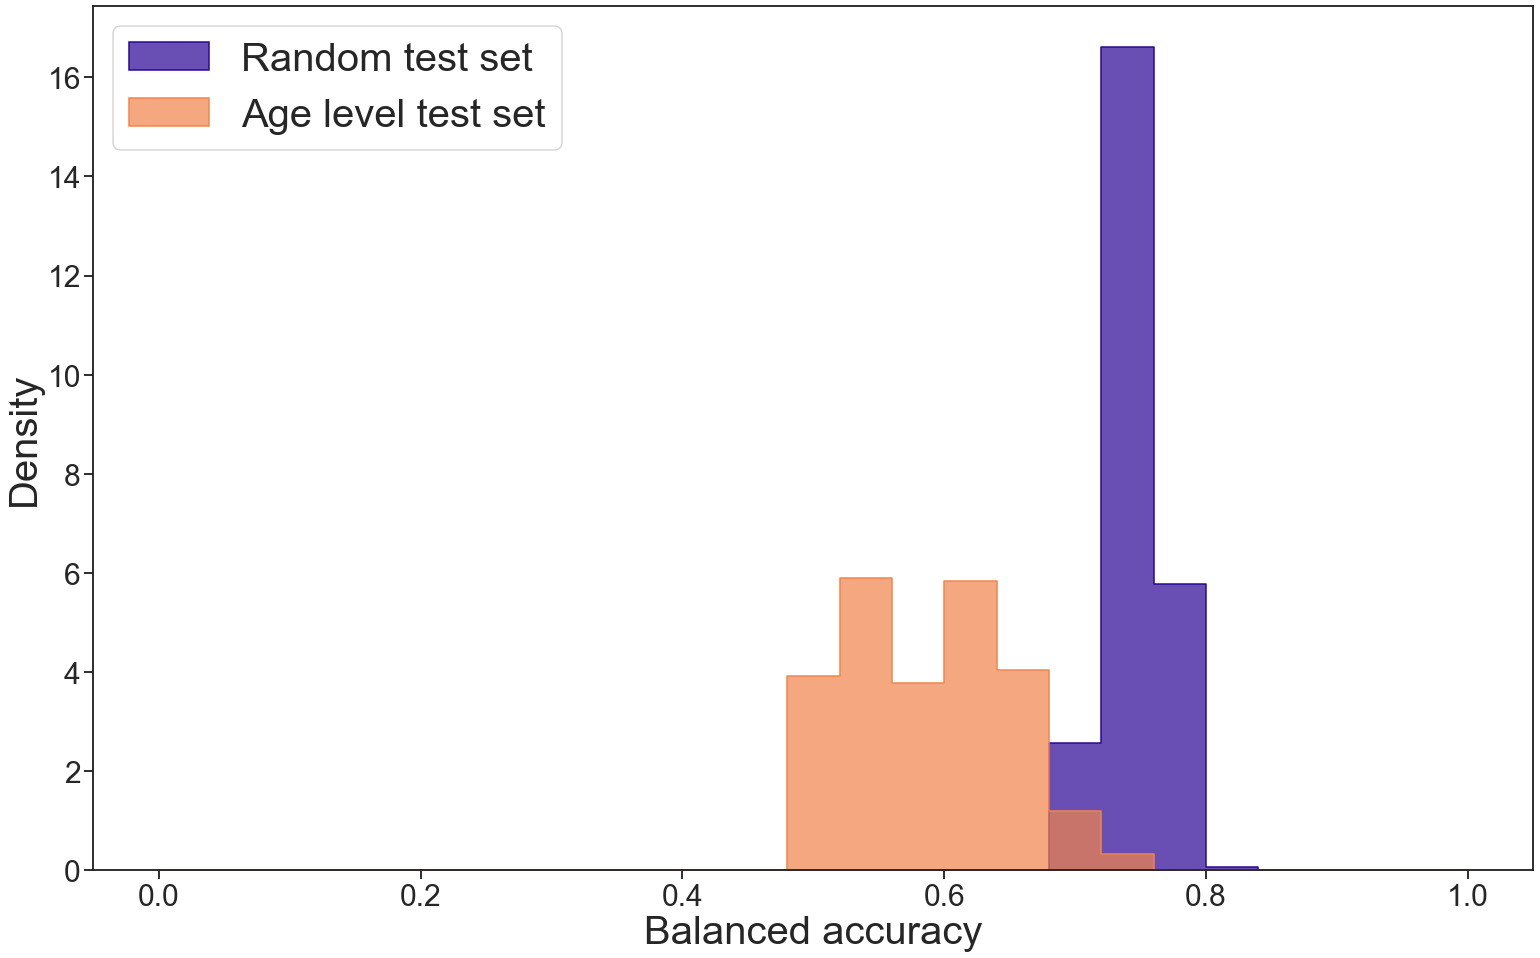

In [7]:
sns.set(context='talk', font_scale=1.75,  color_codes=True, palette='deep', style='ticks')
#sns.set_theme(style="white",palette="plasma")
fig = plt.figure(figsize=(20,12))
ax = fig.add_axes([0,0,1,1])
#ax.set_title("Random Forest AUC distribution",fontsize=60)
ax.set_xlabel("Balanced accuracy", fontsize=40)
ax.set_ylabel("Density",fontsize=40)
ax.tick_params(labelsize=30)
sns.histplot(acc_global_clf,binrange=(0,1),bins=25,ax=ax,color=c_1,stat="density",alpha=0.7,label="Random test set",element="step")
sns.histplot(acc_courses_clf,binrange=(0,1),bins=25,ax=ax,color=c_2,stat="density",alpha=0.7,label="Age level test set",element="step")
ax.legend(prop=dict(size=40),loc=2)


fig.savefig('AUC_RF.jpg',dpi=300, bbox_inches = "tight")

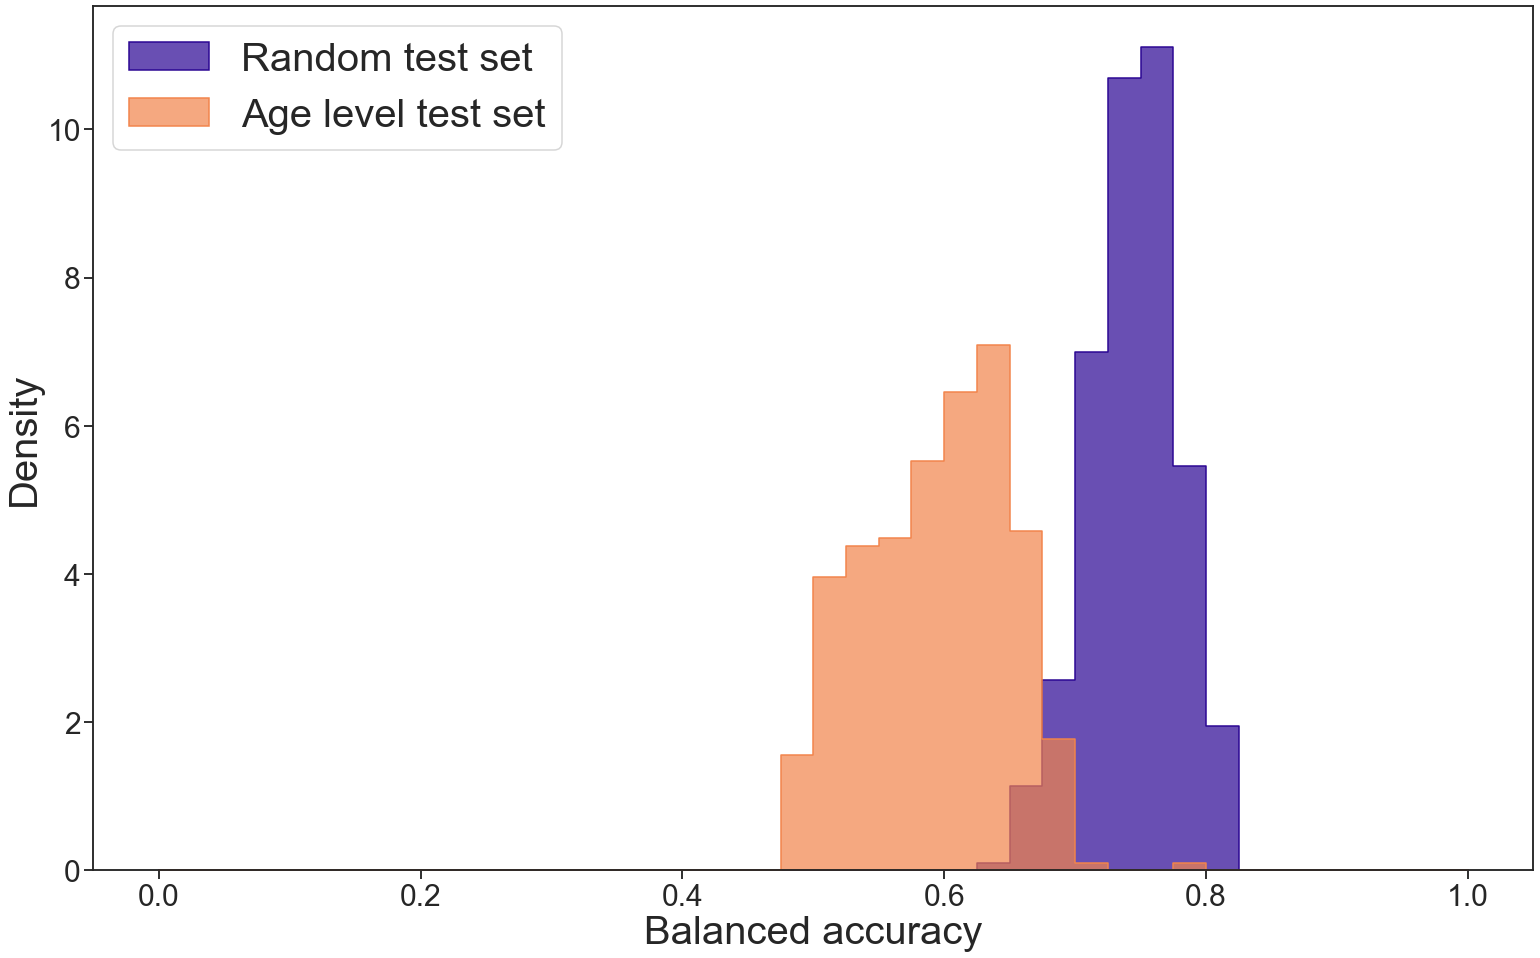

In [8]:
sns.set(context='talk', font_scale=1.75,  color_codes=True, palette='deep', style='ticks')
#sns.set_theme(style="white",palette="plasma")
fig = plt.figure(figsize=(20,12))
ax = fig.add_axes([0,0,1,1])
#ax.set_title("Artificial neural network AUC distribution",fontsize=60)
ax.set_xlabel("Balanced accuracy", fontsize=40)
ax.set_ylabel("Density",fontsize=40)
ax.tick_params(labelsize=30)
sns.histplot(acc_global_ann,binrange=(0,1),bins=40,ax=ax,color=c_1,stat="density",alpha=0.7,label="Random test set",element="step")
sns.histplot(acc_courses_ann,binrange=(0,1),bins=40,ax=ax,color=c_2,stat="density",alpha=0.7,label="Age level test set",element="step")
ax.legend(prop=dict(size=40),loc=2)


fig.savefig('AUC_ANN.jpg',dpi=300, bbox_inches = "tight")

In [9]:
len(acc_global_ann)

389

In [10]:
n_highschools = 13

total_lines = []
for name in ["p1q10_accuracies.txt","p1q0_accuracies_courses.txt"]:
    with open(name) as f:
        total_lines.append(f.readlines())
        
        
courseclassRegex = re.compile(r'\w\w')
classRegex = re.compile("Homogeneous|\d\D\d+\D")
courseRegex = re.compile('\d')

In [11]:
acc_clf_global = total_lines[0][1:n_highschools+1]
acc_ann_global = total_lines[0][n_highschools+2:2*n_highschools+2]
grupos_account = total_lines[0][2*n_highschools+3:3*n_highschools+3]
acc_clf_classes = total_lines[0][3*n_highschools+4:4*n_highschools+4]
acc_ann_classes = total_lines[0][4*n_highschools+5:5*n_highschools+5]
courses_account = total_lines[1][1:n_highschools+1]
acc_clf_courses = total_lines[1][n_highschools+2:2*n_highschools+2]
acc_ann_courses = total_lines[1][2*n_highschools+3:3*n_highschools+3]

In [12]:
acc_clf_global_corrected = [float(el[:-2]) for el in acc_clf_global]
acc_ann_global_corrected = [float(el[:-2]) for el in acc_ann_global]
grupos_account_corrected = []
for el in grupos_account:
    grupos_account_corrected.append(re.findall(courseclassRegex,str(el)))
    

acc_clf_classes_corrected = []
for el in acc_clf_classes:
    acc_clf_classes_corrected.append([float(el2[:-1]) if el2!="Homogeneous" else el2 for el2 in re.findall(classRegex,str(el))])
    

acc_ann_classes_corrected = []
for el in acc_ann_classes:
    acc_ann_classes_corrected.append([float(el2[:-1]) if el2!="Homogeneous" else el2 for el2 in re.findall(classRegex,str(el))])

courses_account_corrected = []
for el in courses_account:
    courses_account_corrected.append(re.findall(courseRegex,str(el)))
    
acc_clf_courses_corrected = []
for el in acc_clf_courses:
    acc_clf_courses_corrected.append([float(el2[:-1]) if el2!="Homogeneous" else el2 for el2 in re.findall(classRegex,str(el))])
    

acc_ann_courses_corrected = []
for el in acc_ann_courses:
    acc_ann_courses_corrected.append([float(el2[:-1]) if el2!="Homogeneous" else el2 for el2 in re.findall(classRegex,str(el))])


In [13]:
cmap = plt.cm.get_cmap('plasma')
c_1 = cmap(0.0)
c_2 = cmap(0.7)

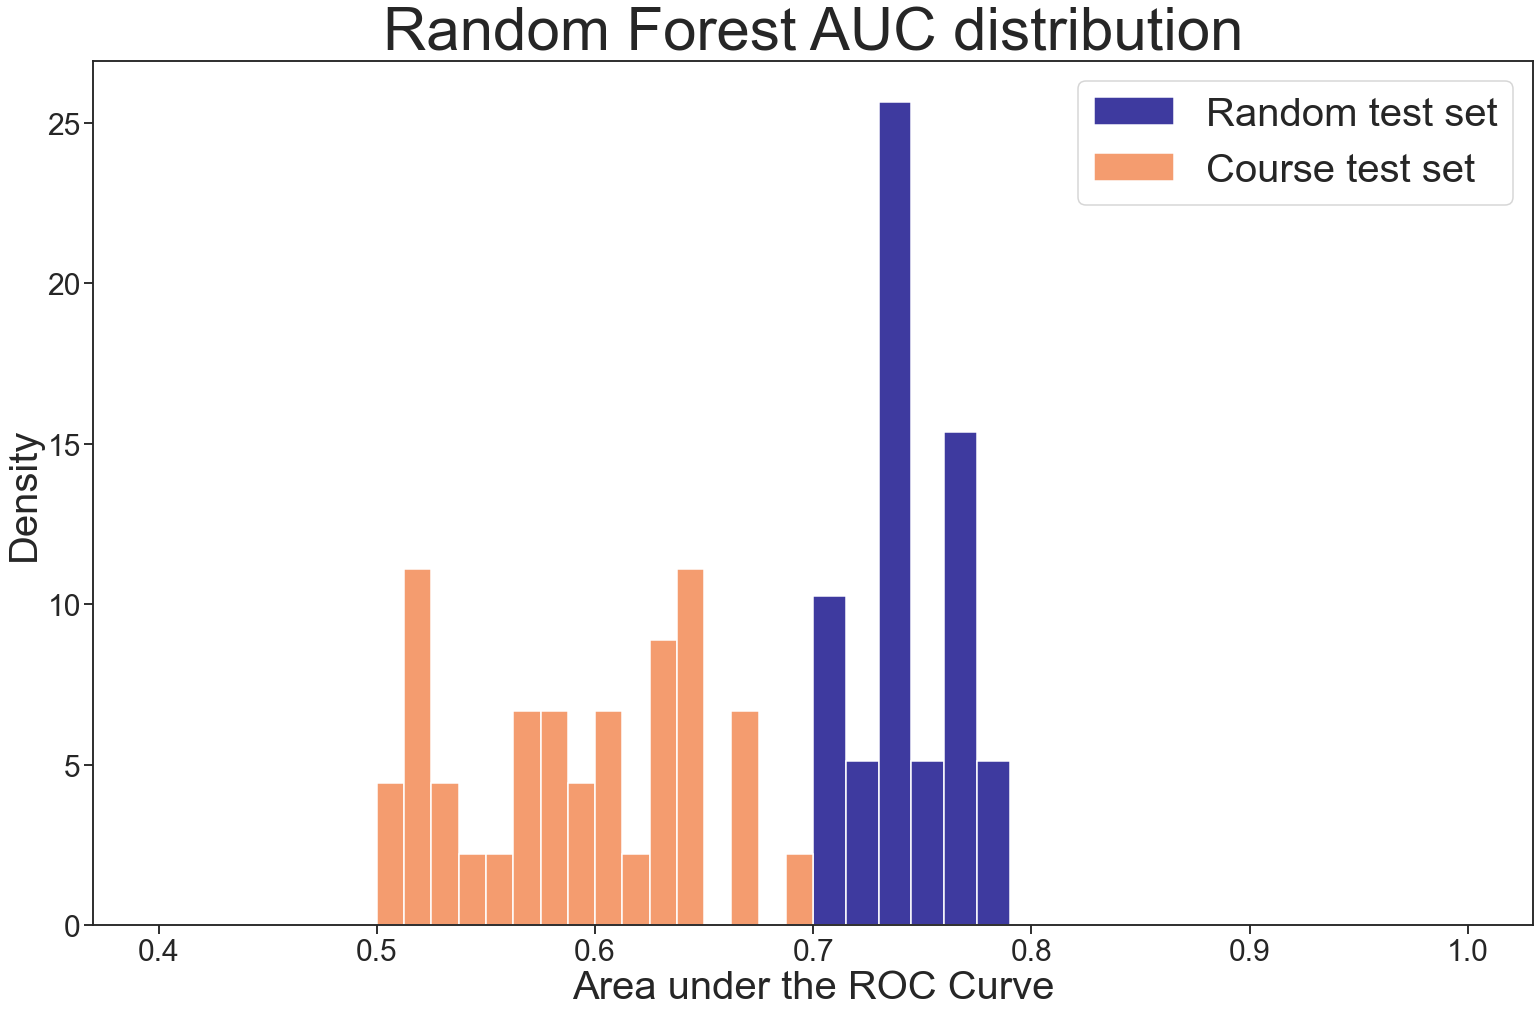

In [14]:
sns.set(context='talk', font_scale=1.75,  color_codes=True, palette='deep', style='ticks')
#sns.set_theme(style="white",palette="plasma")
fig = plt.figure(figsize=(20,12))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Random Forest AUC distribution",fontsize=60)
ax.set_xlabel("Area under the ROC Curve", fontsize=40)
ax.set_ylabel("Density",fontsize=40)
ax.tick_params(labelsize=30)
sns.histplot(acc_clf_global_corrected,binrange=(0.4,1),bins=40,ax=ax,color=c_1,stat="density",alpha=0.8,label="Random test set")
flat_list_courses = [item for sublist in acc_clf_courses_corrected for item in sublist if item!="Homogeneous"]
sns.histplot(flat_list_courses,binrange=(0.5,1),bins=40,ax=ax,color=c_2,stat="density",alpha=0.8,label="Course test set")
ax.legend(prop=dict(size=40))


#fig.savefig('AUC_ANN.eps',dpi=300, bbox_inches = "tight")

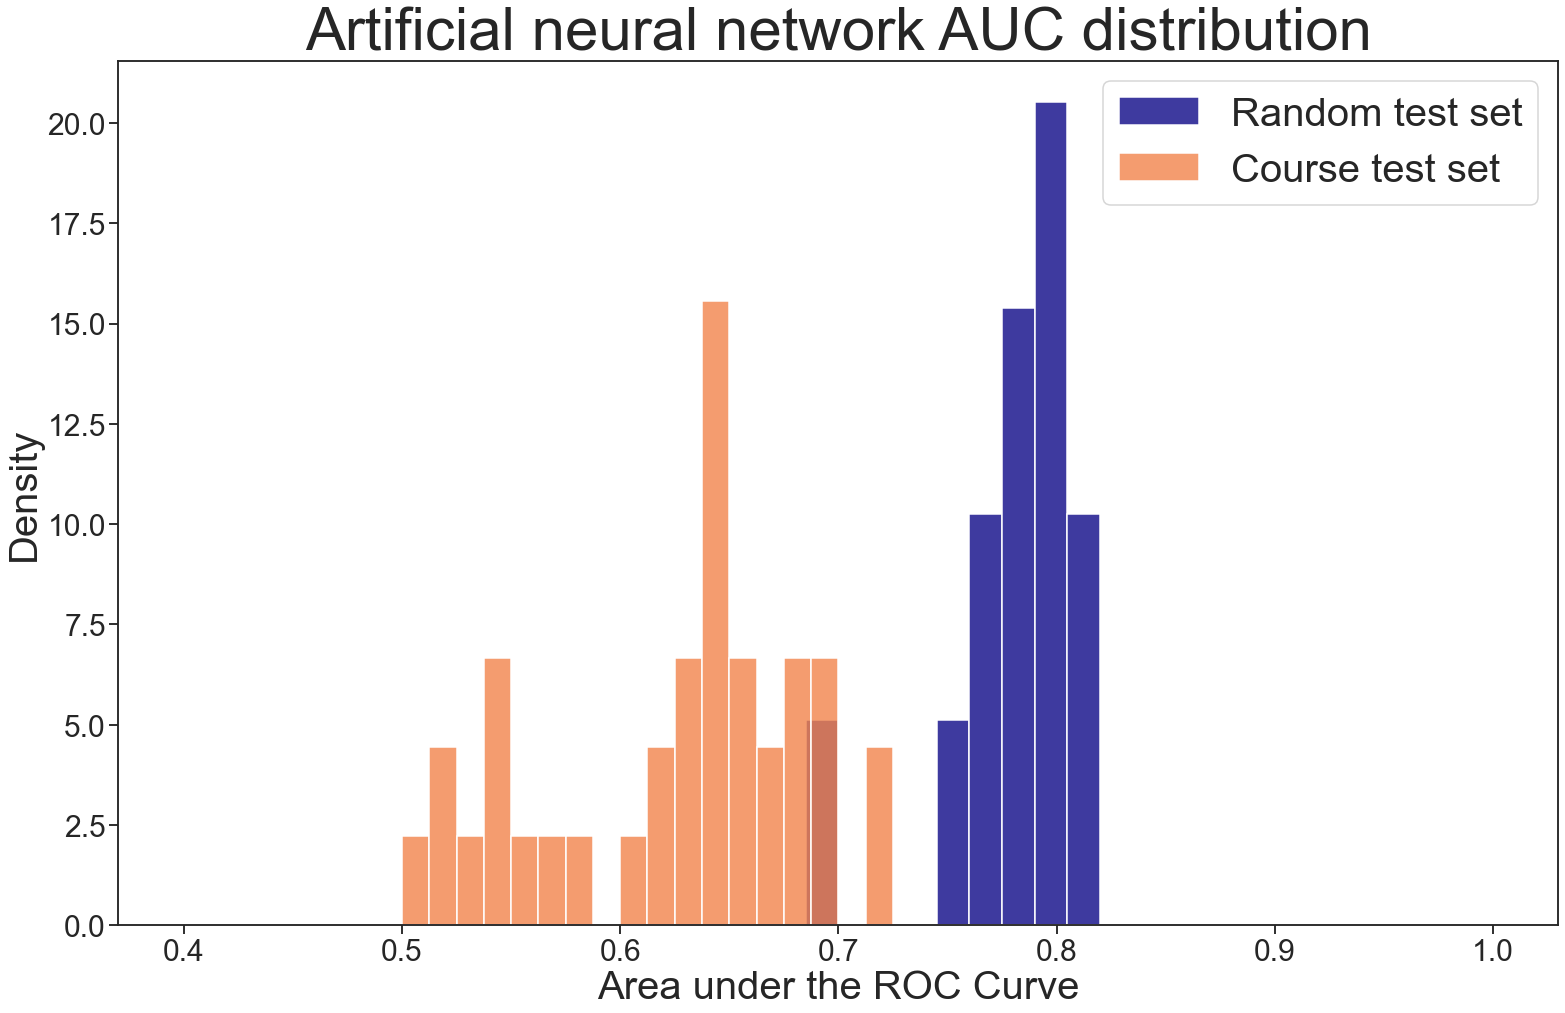

In [15]:
sns.set(context='talk', font_scale=1.75,  color_codes=True, palette='deep', style='ticks')
#sns.set_theme(style="white",palette="plasma")
fig = plt.figure(figsize=(20,12))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Artificial neural network AUC distribution",fontsize=60)
ax.set_xlabel("Area under the ROC Curve", fontsize=40)
ax.set_ylabel("Density",fontsize=40)
ax.tick_params(labelsize=30)
sns.histplot(acc_ann_global_corrected,binrange=(0.4,1),bins=40,ax=ax,color=c_1,stat="density",alpha=0.8,label="Random test set")
flat_list_courses = [item for sublist in acc_ann_courses_corrected for item in sublist if item!="Homogeneous"]
sns.histplot(flat_list_courses,binrange=(0.5,1),bins=40,ax=ax,color=c_2,stat="density",alpha=0.8,label="Course test set")
ax.legend(prop=dict(size=40)) 

#fig.savefig('AUC_RF.eps',dpi=300, bbox_inches = "tight")